# Class 02 : 함수와 미분 - 1


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

style_name = 'bmh' #bmh
mpl.style.use(style_name)
np.set_printoptions(precision=4, linewidth =150)

style = plt.style.library[style_name]
style_colors = [ c['color'] for c in style['axes.prop_cycle'] ]

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
from IPython.core.display import display, HTML

init_notebook_mode(connected=True)

# https://github.com/plotly/plotly.py/issues/515
# The polling here is to ensure that plotly.js has already been loaded before
# setting display alignment in order to avoid a race condition.
display(HTML(
    '<script>'
        'var waitForPlotly = setInterval( function() {'
            'if( typeof(window.Plotly) !== "undefined" ){'
                'MathJax.Hub.Config({ SVG: { font: "STIX-Web" }, displayAlign: "center" });'
                'MathJax.Hub.Queue(["setRenderer", MathJax.Hub, "SVG"]);'
                'clearInterval(waitForPlotly);'
            '}}, 250 );'
    '</script>'
))

## 함수

### Quantities(measurement tools)<sup>[scavec]</sup>

#### 스칼라 

- 어원 : 라틴어 scalar :저울 , 영어 scale/skeil/ : ~을 자로 재다, 라

- 잴수있는 양만으로 표현할 수 있는 물리량, 수학적으로는 숫자 하나

- 예 : 온도

#### 벡터

- vehere : 라틴어 '운반하다', 어떤 물체를 얼마만큼 어디로 운반하다.<sup>[전파거북이:벡터]</sup>

- 양과 방향으로 표현할 수 있는 물리량

- 예 : 속도, 힘

- 3차원 벡터의 예 : $\mathbf{v} = (2, 3, 4)^{\text{T}}$

- 머신러닝에서는 n차원 벡터를 다룸
    


### 함수의 정의

- 첫 번째 집합의 임의의 한 원소를 두 번째 집합의 오직 한 원소에 대응시키는 대응 관계<sup>[wiki:함수]</sup>

- 표기 1. $f : X \to Y$, $X$:정의역<sup>domain</sup>, $Y$:공역<sup>codomain</sup>

- 표기 2. $f(X) = Y$

- 실수 집합 $\mathbb{R}$로 쓸 때 $f:\mathbb{R} \to \mathbb{R}$는 실수를 실수로 대응시키는 함수 예: $f:x \to x^2$

- $f:\mathbb{R}^2 \to \mathbb{R}$, $f: (x_1, x_2) \to x_1 + x_2$

- 입력되는 변수 : 독립변수, 출력되는 변수 : 종속변수

<img src="imgs/Function_machine2.svg.png" width="300">
<h5 align="center">https://en.wikipedia.org/wiki/Function_(mathematics)#/media/File:Function_machine2.svg</h5>

- 사랑의 작대기(?) 와 같은 성질

<img src="imgs/functions.png" width="900"/>




### 함수의 그래프

- 독립변수와 종속변수의 관계를 그림으로 표현

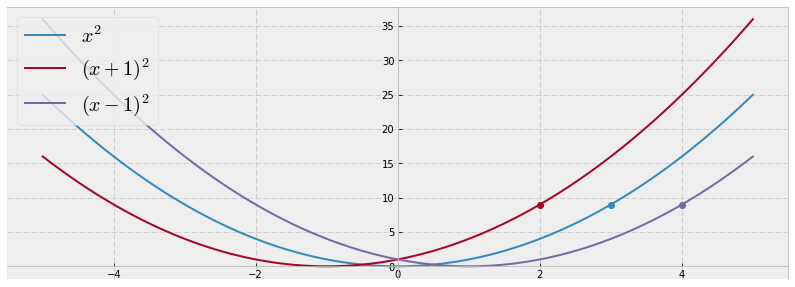

In [2]:
plt.rcParams["figure.figsize"] = (14,5)

fig, ax = plt.subplots()

x = np.linspace(-5, 5, 100)
y1 = x**2
y2 = (x+1)**2
y3 = (x-1)**2

ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')

ax.plot(x, y1, label=r"$x^2$")
ax.plot(x, y2, label=r"$(x+1)^2$")
ax.plot(x, y3, label=r"$(x-1)^2$")

ax.plot(3, 9, 'o', color=style_colors[0])
ax.plot(2, 9, 'o', color=style_colors[1])
ax.plot(4, 9, 'o', color=style_colors[2])

ax.legend(loc="upper left", fontsize=20)

plt.show()

- 위 그래프는 $x$축에서 하나의 값을 선택했을 때 그 선택된 $x^*$의 제곱한 값과 같은 $y$값에 점을 찍어 그린것이다.

- 파란점은 $y=x^2$인 관계에서 $y=9$와 같은 $x$가 이루는 위치에 찍힌 점

- $y = (x+1)^2$인 관계에서  $y=9$와 같아지는 $x$는 3보다 작은 값 $\to$ 그래프가 왼쪽으로 이동

- $y = (x-1)^2$인 관계에서  $y=9$와 같아지는 $x$는 3보다 큰 값 $\to$ 그래프가 오른쪽으로 이동



### 함수의 합성

- 함수 $f:X \to Y$의 공역과 함수 $g : Y \to Z$의 정의역이 같다고 할 때 다음과 같이 정의된 함수 $ g \circ f$를 두 함수 $f$와 $g$의 합성이라고 한다.

- 또는 다음처럼 표기하기도 함 $g(f(X))$

- 쉽게 $f$의 출력이 $g$의 입력으로 들어감

- $ f : x \to 2x$, $g : x \to x^2 +1 $ 일때 

$$ 
g \circ f = g(f(x)) = (2x)^2 + 1 = 4 x^2 + 1
$$



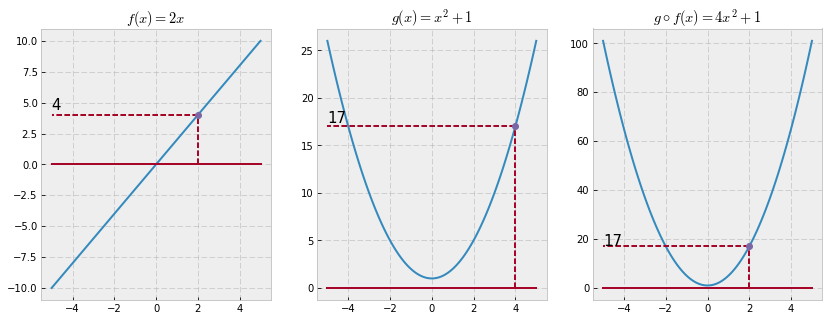

In [3]:
plt.rcParams["figure.figsize"] = (14,5)

x = np.linspace(-5, 5, 100)

f = lambda x : 2*x
g = lambda x : x**2 + 1
gf = lambda x : (2*x)**2 + 1

fig = plt.figure()

ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

ax1.plot(x, f(x))
ax1.plot(x, np.zeros(x.shape[0]))
ax1.set_title('$f(x)=2x$')

ax2.plot(x, g(x))
ax2.plot(x, np.zeros(x.shape[0]))
ax2.set_title('$g(x)=x^2 + 1$')

ax3.plot( x, g(f(x)) )
ax3.plot(x, np.zeros(x.shape[0]))
ax3.set_title('$g \circ f(x)=4x^2 + 1$')

x0 = 2
ax1.plot((x0, x0), (0, f(x0)), '--', color=style_colors[1])
ax1.plot((x0, -5), (f(x0), f(x0)), '--', color=style_colors[1])
ax1.plot(x0, f(x0), 'o')
ax1.text(-5, f(x0)+0.4, "{}".format(f(x0)), fontsize=15)

ax2.plot((f(x0), f(x0)), (0, g(f(x0))), '--', color=style_colors[1])
ax2.plot((f(x0), -5), (g(f(x0)), g(f(x0))), '--', color=style_colors[1])
ax2.plot(f(x0), g(f(x0)), 'o')
ax2.text(-5, g(f(x0))+0.4, "{}".format(g(f(x0))), fontsize=15)

ax3.plot((x0, x0), (0, gf(x0)), '--', color=style_colors[1])
ax3.plot((x0, -5), (gf(x0), gf(x0)), '--', color=style_colors[1])
ax3.plot(x0, gf(x0), 'o')
ax3.text(-5, gf(x0)+0.4, "{}".format(gf(x0)), fontsize=15)

plt.show()

### 역함수

- $f : X \to Y$ 일 때 $g: Y \to X$인 함수가 있어서 $f(x)=y$일 때 $g(y)=x$를 만족하는 함수

- $f$의 역함수가 존재할 필요충분조건 : $f$가 일대일 대응함수

- 표기법 : $f^{-1} : Y \to X, x = f^{-1}(y)$

- 함수와 그의 역함수의 그래프는 $y = x$에 대칭 : 지수함수와 로그함수 그래프로 확인





### 함수의 종류<sup>[곽도영 et. al.]</sup>

- 일반적으로 함수의 종류라하면 다항함수, 분수함수, 지수함수, 로그함수, 삼각함수 등을 가리키지만

- 수업에서는 함수의 입력과 출력의 형태에 따른 분류를 이야기함.

- 앞서 소개한 스칼라, 벡터가 입력과 출력으로 나타남에 따라 함수의 형태가 어떻게 변하는지 중심으로 리뷰

#### 일변수-실함수univariable scalar function
#### 다변수-실함수multivariable scalar function
#### 일변수-벡터함수univariable vector function
#### 다변수-벡터함수multivariable vector function



### 일변수-실함수univariable scalar function

- $y = f(x) \qquad f:\mathbb{R} \to \mathbb{R}$

- **다항함수**, 분수함수, **지수함수**, **로그함수**, 삼각함수

- $f(x) = x^2$



#### 지수 함수

- 머신러닝에 자주 등장하는 대표적인 일변수-실함수인 지수, 로그 함수를 간단히 정리

- 지수함수
$$ y = a^x \qquad a>0, a \ne 1$$

- 그래프는 $a$에 따라 달라짐

- $a>1$: 양의 방향으로 증가, $0<a<1$: 양의 방향으로 감소


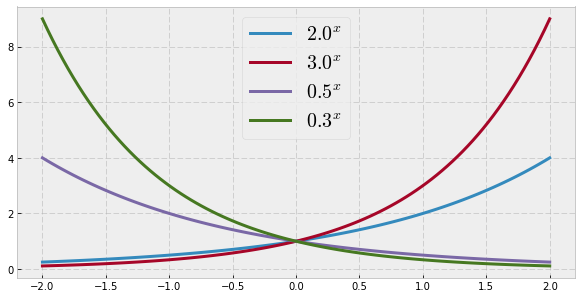

In [4]:
plt.rcParams["figure.figsize"] = (10,5)

x = np.linspace(-2, 2, 100)
A = [2, 3, 1/2, 1/3]

for a in A :
    plt.plot(x, a**x, lw=3, label=r'${:.1f}^x$'.format(a)) 
   
plt.legend(fontsize=20);
plt.show()

#### 몇가지 지수법칙(참고)
$$
\begin{align}
& a^m a^n = a^{m+n} \\[5pt]
& a^m \div a^n = a^{m-n}\\[5pt]
& \left(a^m\right)^n = a^{mn} \\[5pt]
& \left(ab\right)^m = a^{m}b^{m} \\[5pt]
& a^0 = 1\\[5pt]
& a^{-m}=\frac{1}{a^m} \qquad \because a^m a^{-m} = a^{m+(-m)} = a^0 = 1
\end{align}
$$

#### 자연상수, 무리수 $e$

- 아코프 베르누이에 의해 다음식이 수렴함이 발견 

- 고트프리트 빌헬름 라이프니츠에의해 상수 $b$로 처음 사용

- 레온하르트 오일러에 의해 $e$로 처음 표기

$$
\lim_{x \to 0} \left(1+x\right)^{\frac{1}{x}} = e = 2.718...
$$

$$
\lim_{x \to \infty} \left(1+\frac{1}{x}\right)^{x} = e = 2.718...
$$



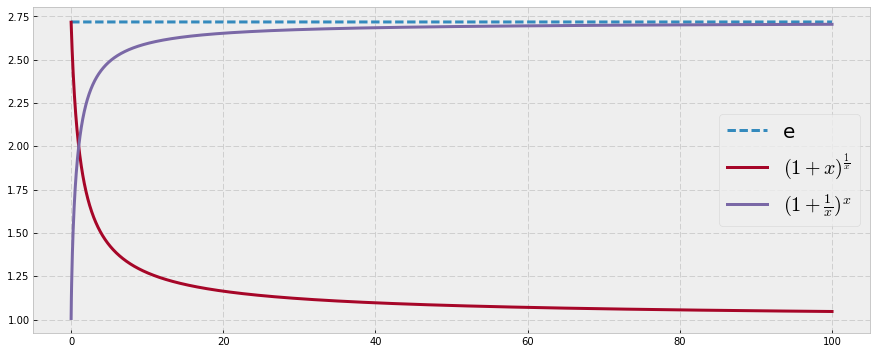

In [5]:
plt.rcParams["figure.figsize"] = (15,6)

x = np.linspace(0.001, 100, 3000)

e1 = (1+x)**(1/x)
e2 = (1+(1/x))**x

plt.plot(x, np.ones(x.shape)*np.e, '--', label="e", lw=3)
plt.plot(x, e1, label=r"$(1+x)^{\frac{1}{x}}$", lw=3)
plt.plot(x, e2, label=r"$(1+\frac{1}{x})^x$", lw=3)
plt.legend(fontsize=20)

plt.show()

#### 로그 함수

- 로그 정의

$$
\log_{a} x = c
$$

- 로그는 숫자, 위 식에서 $a$를 $x$로 만들기 위해 $a$의 어깨위에 거듭 제곱 되어야 하는 숫자가 로그 

$$ a^c = x$$

- 따라서 정의대로 써보면 

$$
a^{\log_a x} = x
$$

- $x$를 바꿔가면서 함수처럼 생각해볼 수 있다.

- 자연로그 : 특히 $a$가 $e$인 경우 $\log_{e}$를 $\ln$으로 표시

- 식을 보면 로그의 출력이 지수식의 입력으로 들어가고 지수식의 출력이 로그의 입력으로 $\implies$ 역함수 관계


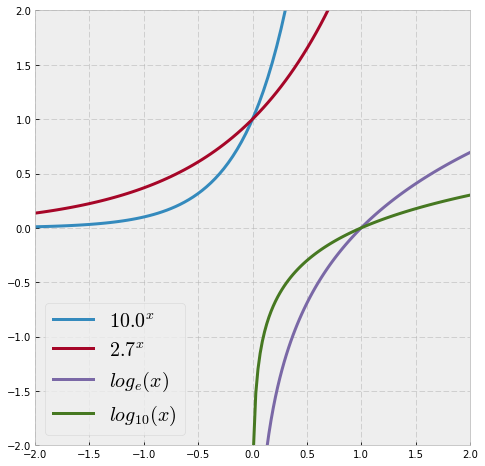

In [6]:
plt.rcParams["figure.figsize"] = (8,8)

x = np.linspace(-2, 2, 100)
x2 = np.linspace(0.01, 2, 100)

A = [10, np.e]

for a in A :
    plt.plot(x, a**x, lw=3, label='${:.1f}^x$'.format(a)) 

plt.plot(x2, np.log(x2), lw=3, label='$log_e(x)$')
plt.plot(x2, np.log10(x2), lw=3, label='$log_{10}(x)$')
    
plt.legend(fontsize=20)
plt.axis('equal')

plt.axis('square')
plt.xlim(-2, 2)
plt.ylim(-2, 2)

plt.show()

#### 로그의 성질(참고)

- $ \log_a 1 = 0, \log_a a = 1$, $a^{\log_{a} 1} = 1$, $a^{\log_{a} a} = a$

- $ \log_a M N = \log_a M + \log_a N$

$\log_a M N$은 $a$를 $MN$으로 만들기 위해 어깨위에 올라가는 수

$$
\begin{align}
& a^{\log_{a} MN} = MN \\[5pt]
& a^{\log_{a} M } = M , \quad a^{\log_{a} N} = N \\[5pt]
& a^{\log_{a} M } \cdot a^{\log_{a} N } = MN  \\[5pt]
& a^{\log_{a} M + \log_{a} N} = MN
\end{align}
$$

- $ \log_a \frac{M}{N} = \log_a M - \log_a N$

- $ \log_a M^k = k \log_a M$

- $\log_a b = \dfrac{\log_c b}{\log_c a}$

로그의 정의의 대로 써주면 

$$
\begin{align}
& a^{\log_a b} =  b \\[5pt]
& \log_c \left( a^{\log_a b} \right) = \log_c b \\[5pt]
& (\log_a b)\log_c a = \log_c b \quad \because \log_a M^k = k \log_a M \\[5pt]
& \log_a b = \frac{\log_c b}{\log_c a} \quad \because \log_c a \ne 0
\end{align}
$$

- 어떤 함수의 극점의 위치를 변화시키지 않는다.

<img src="imgs/log-extrema.gif"/>

### 다변수-실함수multivariable scalar function

- $z = f(x, y)  \qquad f:\mathbb{R}^2 \to \mathbb{R}$

- 가장 자주 보게 될 함수

- 스칼라장<sup>scalar field</sup>를 정의한다고 말한다.

- 공간의 온도장(온도분포), 대기의 기압장(기압분포), 하지만 우리는 물리적 의미는 생각하지 않음

- $f(\mathbf{x}) = f(x_1, x_2) = 2x_1 + 3x_2 - x^{3}_{1} - 2x^{2}_{2} $ 

- 공간에서의 유클리드 거리 $f(\mathbf{p};\mathbf{p}_0) = f(x,y,z;x_0,y_0,z_0) = \sqrt{(x-x_0)^2 + (y-y_0)^2 + (z-z_0)^2}$ 
    - 매개변수 표기법 : $f(\mathbf{p};\mathbf{p}_0)$에서 ; 뒤쪽에 적는 부분은 이 함수를 구성하기위해 필요한 매개변수를 나타낸다. 
    위처럼 어떤 점 $\mathbf{p}$를 입력했을 때 거리를 계산해서 출력하려면 어떤 점으로부터 거리를 계산할 것인지 기준점이 필요한데 이 기준점은 함수를 정의할 때 정해주어야 한다. 그렇게 함수를 목적에 맞게 정의하기 위해 지정해주는 변수를 표현하는 표기법이다.
    
- **우리에게 가장 중요한 예는 목적함수<sup>objective function</sup>, 코스트함수<sup>cost function</sup>**

$$
C(\mathbf{w}) = \frac{1}{2N} \sum_{i=1}^{N} \lVert y(\mathbf{w};\mathbf{x}_i) - t \rVert^2
$$

- 아래 그래프에서 왼쪽 그래프는 $(x_1, x_2)$로 계산된 $f(x_1, x_2)$를 수직축(높이값)에 그린 것

- 오른쪽 그래프는 왼쪽 그래프에서 특정 높이를 만족하는 값만을 모아서 $x_1 x_2$ 평면에 그린것

- 때문에 등고선이 되며 선에 함수값이 적혀 있음

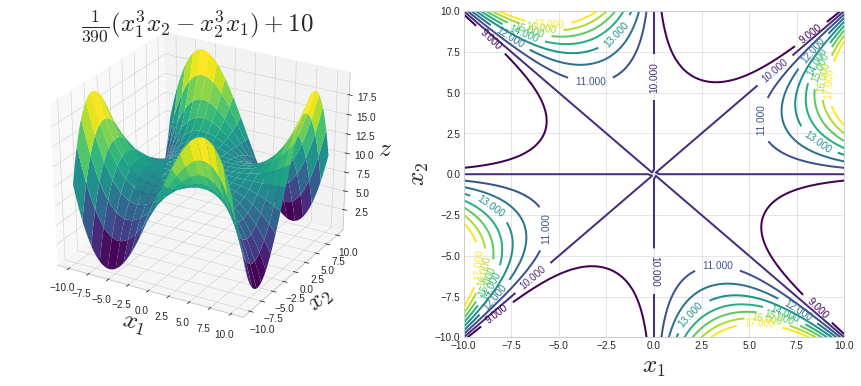

In [7]:
from mpl_toolkits.mplot3d import Axes3D

mpl.style.use('seaborn-whitegrid')
plt.rcParams["figure.figsize"] = (15,6)

# 데이터 준비
x1 = x2 = np.linspace(-10,10,100)
X1, X2 = np.meshgrid(x1, x2)

Z = (1/390.)*(X1**3 * X2 - X2**3 * X1) + 10

fig = plt.figure()

Z_level = np.ones_like(Z)*15
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X1, X2, Z, rstride=5, cstride=5, cmap=plt.cm.viridis, antialiased=True)
#ax1.plot_surface(X1, X2, Z_level, rstride=10, cstride=10, cmap=plt.cm.viridis, alpha=0.5)
ax1.set_xlabel('$x_1$', fontsize=25)
ax1.set_ylabel('$x_2$', fontsize=25)
ax1.set_zlabel('$z$', fontsize=25)
ax1.set_title(r'$\frac{1}{390}(x_1^3 x_2 - x_2^{3}  x_1)+10$', fontsize=25)

ax2 = fig.add_subplot(122)
CS = ax2.contour(X1, X2, Z, levels=np.linspace(9, 17, 9), cmap=plt.cm.viridis)
plt.clabel(CS, inline=True, fontsize=10)
ax2.set_xlabel('$x_1$', fontsize=25)
ax2.set_ylabel('$x_2$', fontsize=25)

plt.show()

mpl.style.use(style_name)

- plotly가 설치되어 있다면 다음 코드로 인터렉티브하게 등고선 그림을 볼 수 있다.

In [8]:
# https://plot.ly/python/
# https://plot.ly/python/offline/

# hover contour off
# https://community.plot.ly/t/trace-lines-appearing-on-hover/5801
data = [
    go.Surface(x=X1, y=X2, z=Z, showscale=False, colorscale='Viridis',
               contours=dict(
                   x=dict(highlight=False), y=dict(highlight=False)
               ),
    ),
]

layout = go.Layout(
    title='Multivariable-Scalar Fucntion',
    autosize=True,
    width=700, height=700,
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

#### 한쪽 변이 숫자로 고정되면? $P(x,y) = c$<sup>[wiki:음함수,양함수]</sup>

- $y=f(x)$ : 종속변수 없이 독립변수들의 식만으로 표현되는 함수 

    - 입력과 출력이 명확히 구분
    
- $P(x,y) = c$ : 종속변수가 독립변수와 분리되지 않은 하나의 관계식으로 주어진 함수 
    
    - 입력과 출력이 명확히 구분되지 않고 특정 결과 $c$를 만들기 위한 변수들의 관계를 표현
    - 종속변수에 대해 식을 정리하여 $y=f(x)$ 꼴로 만들 수 있는 경우도 있지만, 그렇지 못한 경우도 있다.
    - 함수의 정의에 어긋나지만 함수처럼 취급하면 편리한 경우가 많으므로 통상 '함수' $x^2+y^2-1=0$
    
- 2변수 실함수에서 : $z = f(x,y)$ 와  $f(x,y) = \text{const.}$

- 3변수 실함수에서 : $w = f(x,y,z)$ 와 $f(x,y,z) = \text{const.}$

- 뭐가 어떻게 다른지 그림으로 확인해보기



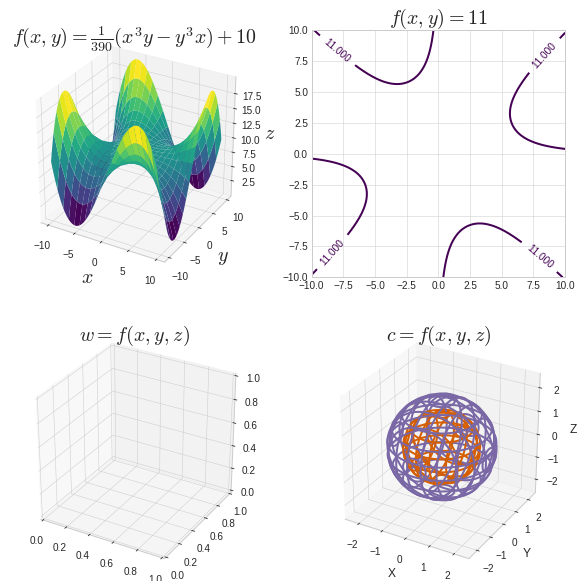

In [9]:
from mpl_toolkits.mplot3d import Axes3D

mpl.style.use('seaborn-whitegrid')
plt.rcParams["figure.figsize"] = (10,10)

# https://stackoverflow.com/questions/4680525/plotting-implicit-equations-in-3d
def plot_implicit(fn, level, fig, loc=111, bbox=(-2.5,2.5)):
    ''' create a plot of an implicit function
    fn  ...implicit function (plot where fn==level)
    bbox ..the x,y,and z limits of plotted interval
    '''
    xmin, xmax, ymin, ymax, zmin, zmax = bbox*3
    
    ax = fig.add_subplot(loc, projection='3d')
    A = np.linspace(xmin, xmax, 100) # resolution of the contour
    B = np.linspace(xmin, xmax, 10)  # number of slices
    A1,A2 = np.meshgrid(A,A)         # grid on which the contour is plotted

    for z in B: # plot contours in the XY plane
        X,Y = A1,A2
        Z = fn(X,Y,z, level)
        cset = ax.contour(X, Y, Z+z, [z], zdir='z', linestyles='solid', colors=style_colors[4])
        Z = fn(X,Y,z, level+2)
        cset = ax.contour(X, Y, Z+z, [z], zdir='z', linestyles='solid', colors=style_colors[2])
        # [z] : 스트라이드를 나타내며 여기서는 숫자 하나가 들어가니가 한번에 한 슬라이스만 그림

    for y in B: # plot contours in the XZ plane
        X,Z = A1,A2
        Y = fn(X,y,Z, level)
        cset = ax.contour(X, Y+y, Z, [y], zdir='y', linestyles='solid', colors=style_colors[4])
        Y = fn(X,y,Z, level+2)
        cset = ax.contour(X, Y+y, Z, [y], zdir='y', linestyles='solid', colors=style_colors[2])

    for x in B: # plot contours in the YZ plane
        Y,Z = A1,A2
        X = fn(x,Y,Z, level)
        cset = ax.contour(X+x, Y, Z, [x], zdir='x', linestyles='solid', colors=style_colors[4])
        X = fn(x,Y,Z, level+2)
        cset = ax.contour(X+x, Y, Z, [x], zdir='x', linestyles='solid', colors=style_colors[2])
    
    ax.set_zlim3d(zmin,zmax)
    ax.set_xlim3d(xmin,xmax)
    ax.set_ylim3d(ymin,ymax)
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    
    ax.set_title('$c=f(x,y,z)$', fontsize=20)

def sphere(x, y, z, a):
    return x**2 + y**2 + z**2 - a

# 데이터 준비
x1 = x2 = np.linspace(-10,10,100)
X1, X2 = np.meshgrid(x1, x2)

Z = (1/390.)*(X1**3 * X2 - X2**3 * X1) + 10

fig = plt.figure()
ax1 = fig.add_subplot(221, projection='3d')
ax1.plot_surface(X1, X2, Z, rstride=5, cstride=5, cmap=plt.cm.viridis, antialiased=True)
ax1.set_xlabel('$x$', fontsize=20)
ax1.set_ylabel('$y$', fontsize=20)
ax1.set_zlabel('$z$', fontsize=20)
ax1.set_title(r'$f(x,y)=\frac{1}{390}(x^3 y - y^{3}  x)+10$', fontsize=20)

ax2 = fig.add_subplot(222)
CS = ax2.contour(X1, X2, Z, levels=[11], cmap=plt.cm.viridis)
plt.clabel(CS, inline=True, fontsize=10)
ax2.set_title('$f(x,y)=11$', fontsize=20)

ax3 = fig.add_subplot(223, projection='3d')
ax3.set_title('$w=f(x,y,z)$', fontsize=20)

plot_implicit(sphere, 2, fig, 224)

plt.show()
mpl.style.use(style_name)

### 일변수-벡터함수univariable vector function

- $\mathbf{r}(t) = (x(t), y(t), z(t))$

- 평면 또는 공간에 존재하는 곡선

- $f\left(x(t), y(t), z(t) \right) = \left(\sin(6t), \frac{1}{4}t, \frac{t^2}{2} \right)^{\text{T}}$



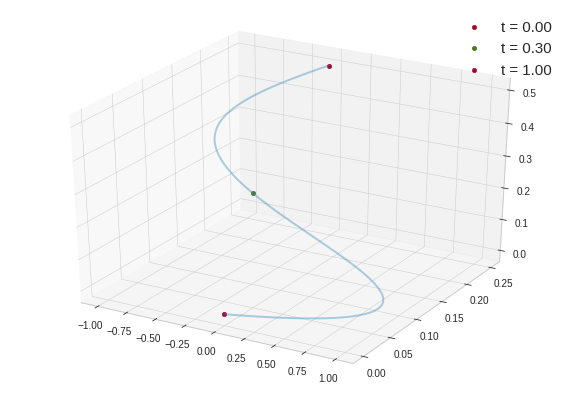

In [10]:
mpl.style.use('seaborn-whitegrid')
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams["figure.figsize"] = (10,7)

t = np.linspace(0, 1, 100)

x = np.sin(6*t)
y = 1/4 * t
z = t**2 / 2

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot3D(x, y, z, alpha=0.4)
#ax.scatter(x, y, z, '.', alpha=0.4)
ax.scatter(x[0],  y[0],  z[0], 'o', color=style_colors[1], label="t = {:.2f}".format(t[0]))
ax.scatter(x[60], y[60], z[60], 'o', color=style_colors[3], label="t = {:.2f}".format(t[30]))
ax.scatter(x[-1], y[-1], z[-1], 'o', color=style_colors[1], label="t = {:.2f}".format(t[-1])) 

ax.legend(fontsize=15)

plt.show()

### 다변수-벡터함수multivariable vector function

- 파라메트릭 표현<sup>parametric representation</sup>으로 3차원에 존재하는 곡면<sup>[choi]</sup>

$$
\mathbf{r}(u,v) = \left( x(u, v), y(u, v), z(u, v) \right)^{\text{T}} \qquad \mathbb{R}^2 \to \mathbb{R}^3
$$

- 예<sup>[choi]</sup> : $\mathbf{r}(u,v) = (\cos u \sin v , \sin u \sin v , \cos v)^{\text{T}} \qquad 0 \le u \le 2\pi, \quad 0 \le v \le \pi$

- 곡면에서의 법선벡터장<sup>normal vector field</sup>
    - 곡면 위의 모든 점에서 그 곡면의 수직 방향으로 존재하는 벡터들의 모임


$$
\mathbf{n}(t, s) = \frac{\dfrac{\partial \mathbf{r}}{\partial t} \times \dfrac{\partial{\mathbf{r}}}{\partial s}}{\lvert \mathbf{n} \rvert} \qquad \mathbb{R}^2 \to \mathbb{R}^3 
$$

- 예<sup>[khan:unitnormal]</sup> : 곡면 $ \mathbf{r}(t, s) =  (t+1, s, s^2-t^2 +1)^{\text{T}}$의 법선 벡터장

-  소프트맥스 활성함수<sup>softmax activation function</sup>

$$
\sigma : \mathbb{R}^{K} \to [0,1]^{K} \\[5pt]
\sigma(\mathbf{z})_j = \frac{e^{z_j}}{\sum_{k=1}^{K} e^{z_k}}
$$



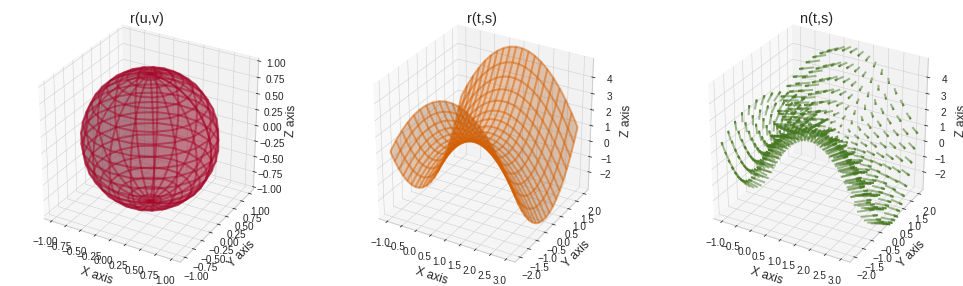

In [11]:
mpl.style.use('seaborn-whitegrid')
plt.rcParams["figure.figsize"] = (17,5)
# plt.rcParams["figure.figsize"] = (10,3) #for notebook mode

u = np.linspace(0, 2*np.pi, 20)
v = np.linspace(0, np.pi, 20)

# parametric vector valued vector function
U,V = np.meshgrid(u,v)
X = np.cos(U)*np.sin(V)
Y = np.sin(U)*np.sin(V)
Z = np.cos(V)

fig = plt.figure()
ax1 = fig.add_subplot(131, projection='3d')

ax1.plot_surface(X,Y,Z,  alpha=0.3, color=style_colors[1])
ax1.plot_wireframe(X,Y,Z,  alpha=0.5, color=style_colors[1])
ax1.set_xlabel('X axis')
ax1.set_ylabel('Y axis')
ax1.set_zlabel('Z axis')
ax1.set_title('r(u,v)')

# unit vector field
t = np.linspace(-2, 2, 20)
s = np.linspace(-2, 2, 20)

T, S = np.meshgrid(t, s)
X, Y, Z = T+1, S, S**2-T**2+1
Nx, Ny, Nz = 2*T, -2*S, np.ones(T.shape) #법선 벡터장 eq()

ax2 = fig.add_subplot(132, projection='3d')
ax2.plot_surface(X,Y,Z, alpha=0.3, color=style_colors[4])
ax2.plot_wireframe(X,Y,Z, alpha=0.5, color=style_colors[4])
ax2.set_xlabel('X axis')
ax2.set_ylabel('Y axis')
ax2.set_zlabel('Z axis')
ax2.set_title('r(t,s)')

ax3 = fig.add_subplot(133, projection='3d')
ax3.quiver(X,Y,Z, Nx,Ny,Nz, length=0.5, normalize=True, color=style_colors[3], alpha=0.5)
ax3.set_xlabel('X axis')
ax3.set_ylabel('Y axis')
ax3.set_zlabel('Z axis')
ax3.set_title('n(t,s)')

plt.show()

In [12]:
# 소프트맥스 함수 동작 실험

z = np.array([1.0, 2.0, 3.0, 4.0, 1.0, 2.0, 3.0])
exp_z = np.exp(z)
print("input vector z : {}".format(exp_z))

sum_exp_z = exp_z.sum()
print("sum exp(z)     : {}".format(sum_exp_z))

softmax = exp_z / sum_exp_z
print("softmax(z)     : {}".format(softmax))
print("sum softmax(z) : {:.2f}".format(softmax.sum()))

input vector z : [ 2.7183  7.3891 20.0855 54.5982  2.7183  7.3891 20.0855]
sum exp(z)     : 114.98389973429897
softmax(z)     : [0.0236 0.0643 0.1747 0.4748 0.0236 0.0643 0.1747]
sum softmax(z) : 1.00


## 참고문헌

1. [scavec] Scalars and Vectors, http://www.physicsclassroom.com/class/1DKin/Lesson-1/Scalars-and-Vectors

2. [전파거북이:벡터] 좌표계 기반 벡터(vector), https://ghebook.blogspot.kr/2010/07/vector.html

3. [wiki:함수] https://ko.wikipedia.org/wiki/함수

4. [곽도영 et. al.] 벡터 미적분학, 곽도영,서동엽,임진환,진교택, 경문사

5. [wiki:음함수,양함수] https://ko.wikipedia.org/wiki/음함수와_양함수

6. [choi] Surface Modeling for CAD/CAM - Advanced in Industrial Engineering, Byoung K. Choi, Elsevier

7. [khan:unitnormal] Unit normal vector of a surface, https://www.khanacademy.org/math/multivariable-calculus/integrating-multivariable-functions/flux-in-3d-articles/a/unit-normal-vector-of-a-surface





In [13]:
%%html
<link href='https://fonts.googleapis.com/earlyaccess/notosanskr.css' rel='stylesheet' type='text/css'>
<!--https://github.com/kattergil/NotoSerifKR-Web/stargazers-->
<link href='https://cdn.rawgit.com/kattergil/NotoSerifKR-Web/5e08423b/stylesheet/NotoSerif-Web.css' rel='stylesheet' type='text/css'>
<!--https://github.com/Joungkyun/font-d2coding-->
<link href="http://cdn.jsdelivr.net/gh/joungkyun/font-d2coding/d2coding.css" rel="stylesheet" type="text/css">
<style>
    h1     { font-family: 'Noto Sans KR' !important; color:#348ABD !important;   }
    h2     { font-family: 'Noto Sans KR' !important; color:#467821 !important;   }
    h3, h4 { font-family: 'Noto Sans KR' !important; color:#A60628 !important;   }
    p:not(.navbar-text) { font-family: 'Noto Serif KR', 'Nanum Myeongjo'; font-size: 12pt; line-height: 200%;  text-indent: 10px; }
    li:not(.dropdown):not(.p-TabBar-tab):not(.p-MenuBar-item):not(.jp-DirListing-item):not(.p-CommandPalette-header):not(.p-CommandPalette-item):not(.jp-RunningSessions-item)
            { font-family: 'Noto Serif KR', 'Nanum Myeongjo'; font-size: 12pt; line-height: 200%; }
    table  { font-family: 'Noto Sans KR' !important;  font-size: 11pt !important; }           
    li > p  { text-indent: 0px; }
    li > ul { margin-top: 0px !important; }       
    sup { font-family: 'Noto Sans KR'; font-size: 9pt; } 
    code, pre  { font-family: D2Coding, 'D2 coding' !important; font-size: 12pt !important; line-height: 130% !important;}
    .code-body { font-family: D2Coding, 'D2 coding' !important; font-size: 12pt !important;}
    .ns        { font-family: 'Noto Sans KR'; font-size: 15pt;}
    .summary   {
                   font-family: 'Georgia'; font-size: 12pt; line-height: 200%; 
                   border-left:3px solid #FF0000; 
                   padding-left:20px; 
                   margin-top:10px;
                   margin-left:15px;
               }
    .green { color:#467821 !important; }
    .comment { font-family: 'Noto Sans KR'; font-size: 10pt; }
</style>